(768, 9)
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 64)                576       
                                                                 
 dense_24 (Dense)            (None, 32)                2080      
                                                                 
 dense_25 (Dense)            (None, 16)                528       
                                                                 
 dense_26 (Dense)            (None, 8)                 136       
                                                                 
 dense_27 (Dense)            (None, 1)                 9         
                                                                 
Total params: 3,329
Trainable params: 3,329
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/250
52/52 [===================

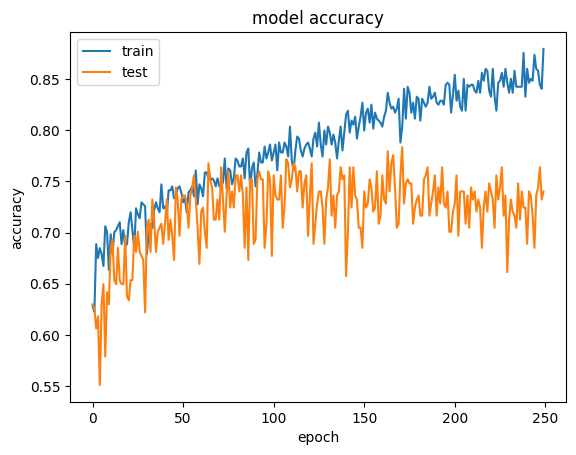

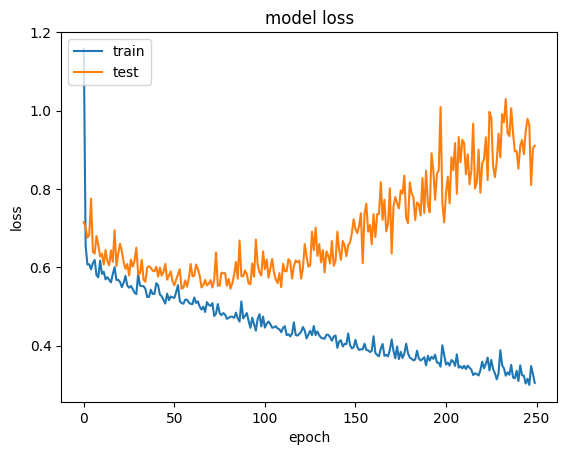

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
# load pima indians dataset
#1. Chuẩn bi data:sinh viên vào google gõ tên file và load về
#máy mình
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")
print(dataset.shape)
# split into input (X) and output (Y) variables
#2. Giải thích X,Y các chỉ số trong[], thử thay đổi 1 chỉ số
#khác xem sao. Cho ví dụ
# X là các chỉ số của các cột trong file csv
X = dataset[:,0:8]
# Y là chỉ số của cột thứ 9(lable)
Y = dataset[:,8]
# create model
#3. Xây dựng model. Giải thích các dòng lệnh sau
# Tạo model Sequential 
model = Sequential()
# Thêm 1 lớp Dense với 12 nơ ron, 8 đầu vào, activation='relu' cho đầu ra không âm 0 đến max(đầu vào)
model.add(Dense(64, input_dim=8, activation='relu'))
# Thêm 1 lớp Dense với 8 nơ ron, activation='relu' cho đầu ra không âm 0 đến max(đầu vào)
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))


# Thêm 1 lớp Dense với 1 nơ ron, activation='sigmoid' cho đầu ra 0 đến 1
model.add(Dense(1, activation='sigmoid'))
# Compile model
#4. compile và giải thích 3 tham số loss, optimizer, metrics

# loss: hàm mất mát, optimizer: thuật toán tối ưu, metrics: đánh giá

# binary_crossentropy là hàm mất mát cho bài toán phân loại 2 lớp
# adam là thuật toán tối ưu
# accuracy là đánh giá

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print (model.summary())
# Fit the model
#5. fit model: giải thích các tham số…epoch, batch…
# verbose=0: không hiển thị quá trình train, verbose=1: hiển thị quá trình train, verbose=2: hiển thị quá trình train ngắn gọn
# validation_split: tỷ lệ dữ liệu dùng để kiểm tra
# epochs: số lần học lại toàn bộ dữ liệu
# batch_size: số lượng dữ liệu được chia ra để train
history = model.fit(X, Y, validation_split=0.33, epochs=250, batch_size=10, verbose=1)

# list all data in history
#6. Giải thích history
# history.history là 1 dict chứa các giá trị loss, accuracy, val_loss, val_accuracy
print(history.history.keys())
# summarize history for accuracy
#7. Giải thích Biểu đồ
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
#8. Giải thích biểu đồ
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()